In [1]:
import matplotlib.pyplot as plt
import sys

sys.path.append('../../')
from busi.air import vapor_pressure as vp

# Introduction

# Functions

## Vapor Pressure and Absolute Humidity

$$
P_v = P_{atm} \times \frac{X}{(0.622 + X)}
$$

$$
X = 0.622 \times \frac{P_v}{(P_{atm}-P_v)}
$$

Where  
$P_V$ is the vapor pressure (Pa);  
$P_{atm}$ is the atmospheric pressure (Pa) ( = 101325 );  
$X$ is the absolute humidity (kg/kgDA).

In [2]:
def ah_to_pv(x: float) -> float:
    """calculate the vapour pressure from the absolute humidity

    Args:
        x: absolute humidity, kg/kgDA

    Returns:
        vapour pressure, Pa
    """
    
    return vp.ah_to_pv(x)

In [3]:
def pv_to_ah(p_v: float) -> float:
    """calculate the absolute humidity from the vapour pressure
    
    Args:
        p_v: vapour pressure, Pa

    Returns:
        absolute humidity, kg/kgDA
    """

    return vp.pv_to_ah(p_v)

### Basis

Based on Dalton's law,  

$ p_i = p_{total} \times x_{i} $  

where  
$p_i$ is the partial pressures of each component (Pa);  
$p_{total}$ is the total pressure (Pa);  
$x_i$ is the mole fraction of the $i$ th component.

In case of the absolute humidity of $X$,  
the weight ratio is;  
$ \text{air} : \text{vapor} = 1 : X $.  
The mole fraction ration is;  
$ \text{air} : \text{vapor} = 1 / 28.966 : X / 18.0 = 18.0 / 28.966 : X \simeq 0.622 : X $  
Because,
the moleculer number of water (H<sub>2</sub>O) is 18.0.  
And, the moleculer number of air is 28.8 ( $ 32 \times 0.2 +28 \times 0.8 =28.8 $ ) ( O<sub>2</sub> = 32, N<sub>2</sub> =28 ) and assumed that the air is composed of O<sub>2</sub> of 80% and N<sub>2</sub> of 20%.  
Actually, the air include the other components such as argon and carbon dioxide, and then the moleculer number of air is assumed to be 28.966 (g/mol) here.


### Example

In [4]:
pv_to_ah(500)

0.0030845524423506075

In [5]:
ah_to_pv(0.0030845524423506075)

500.0

## Relative Humidity and Vapor Pressure

$$
\phi = \frac{p_v}{p_{sv}} \times 100
$$

$$
p_v = p_{sv} \times \frac{\phi}{100}
$$

Where  
$P_V$ is the vapor pressure (Pa);  
$P_{sv}$ is the saturated vapor pressure (Pa);  
$\psi$ is the relative humidity (0~100) (%).

In [6]:
def pv_to_rh(p_v: float, t: float, equation: str, status: str) -> float:
    """calculate the relative humidity from the vapour pressure and temperature
    
    Args:
        p_v: vapour pressure, Pa
        t: temperature, K
        equation: used equation for saturated vapour pressure
        status: ice or water

    Returns:
        relative humidity, %
    """

    return vp.pv_to_rh(p_v, t, equation, status)

In [7]:
def rh_to_pv(phi: float, t: float, equation: str, status: str) -> float:
    """calculate the vapour pressure from the relative humidity and temperature
    
    Args:
        phi: relative humidity, %
        t: temperature, K
        equation: used equation for saturated vapour pressure
        status: ice or water

    Returns:
        vapour pressure, Pa
    """

    return vp.rh_to_pv(phi, t, equation, status)

### Example

In [8]:
pv_to_rh(1000, 303.15,'SONNTAG','water')

23.54587078514155

In [9]:
rh_to_pv(23.54587078514155, 303.15,'SONNTAG','water')

1000.0

## Absolute and Relative Humidity

Relative humidity (%) to absolute humidity (kg/kgDA).

In [10]:
def rh_to_ah(phi: float, t: float, equation: str, status: str) -> float:
    """calculate absolute humidity from relative humidity and temperature
    
    Args:
        phi: relative humidity, %
        t: temperature, K
        equation: used equation for saturated vapour pressure
        status: ice or water

    Returns:
        absolute humidity, kg/kgDA
    """

    return vp.rh_to_ah(phi, t, equation, status)

Absolute humidity (kg/kgDA) to relative humidity (%).

In [11]:
def ah_to_rh(x: float, t: float, equation: str, status: str) -> float:
    """calculate relative humidity from absolute humidity and temperature
    
    Args:
        x: absolute humidity, kg/kgDA
        t: temperature, K
        equation: used equation for saturated vapour pressure
        status: ice or water

    Returns:
        relative humidity, %
    """
    
    return vp.ah_to_rh(x, t, equation, status)

### Example 1

In [12]:
rh_to_ah(50.0,298.15,'SONNTAG','water')

0.009884095183878179

In [13]:
ah_to_rh(0.009884095183878179,298.15,'SONNTAG','water')

49.99999999999999

### Example 2

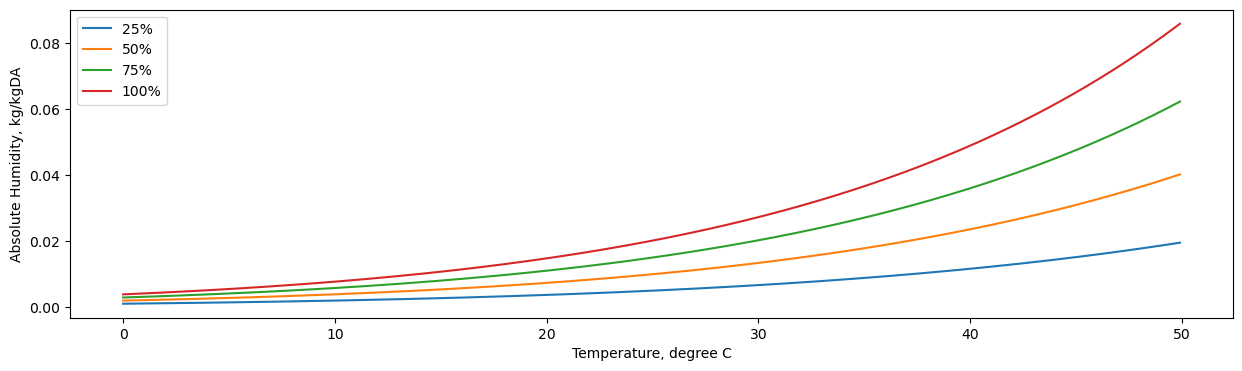

In [14]:
temp = [ 0.1 * x for x in range(0,500)]
plt.figure( figsize = (15,4) )
for rh in [25,50,75,100]:
    ah = [ rh_to_ah(rh, t + 273.15, 'SONNTAG', 'water') for t in temp ] 
    plt.plot(temp,ah,label= str(rh) + '%')
plt.legend()
plt.xlabel('Temperature, degree C')
plt.ylabel('Absolute Humidity, kg/kgDA')
plt.show()

## Saturated Absolute Humidity

In [15]:
def get_saturated_absolute_humidity(t: float, equation: str, status: str) -> float:
    """calculate the saturated absolute humidity from the temperature
    
    Args:
        t: temperature, K
        equation: used equation for saturated vapour pressure
        status: ice or water

    Returns:
        saturated absolute humidity, kg/kgDA
    """
    
    return vp._get_saturated_absolute_humidity(t, equation, status)

### Example

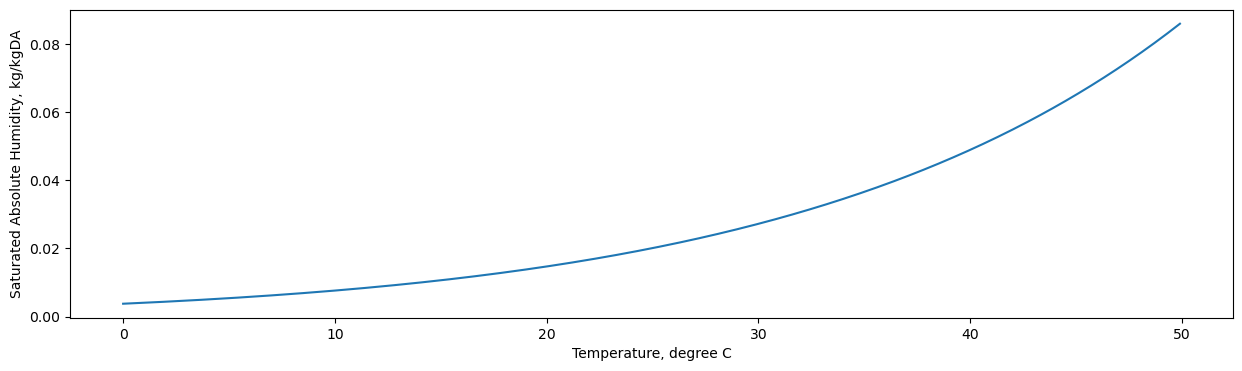

In [16]:
temp = [ 0.1 * x for x in range(0,500)]
plt.figure( figsize = (15,4) )
ah = [ get_saturated_absolute_humidity(t + 273.15, 'SONNTAG', 'water') for t in temp ] 
plt.plot(temp,ah)
plt.xlabel('Temperature, degree C')
plt.ylabel('Saturated Absolute Humidity, kg/kgDA')
plt.show()

## Dew Point Temperature

In [17]:
def get_dew_point_temp(x_s: float, equation: str, status: str) -> float:
    """calculate the dew point temperature from the absolute humidity
    
    Args:
        x_s: absolute humidity, kg/kgDA
        equation: used equation for saturated vapour pressure
        status: ice or water

    Returns:
        dew point temperature, K
    """
    
    return vp.t_dewp(x_s, equation, status)

### Example

In [18]:
get_saturated_absolute_humidity(293.15, 'SONNTAG', 'water')

0.014699216458052453

In [19]:
get_dew_point_temp(0.014699216458052453, 'SONNTAG', 'water')

293.15